In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
train = pd.read_csv('hr-analytics-case-study/employee_promo_train_fr.csv')
test = pd.read_csv('hr-analytics-case-study/employee_promo_test.csv')
train.drop('Unnamed: 0', axis=1, inplace=True)
train.head()

,idEmploye,departement,region,nivDiplome,sexe,chaineRecrutement,nbrFormation,age,noteAnneDerniere,anneeExperience,avoirPrix,noteMoyFormation,estPromu
0,65438,Ventes,region_7,Master ou plus,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,License,m,autre,1,30,5.0,4,0,60,0
2,7513,Ventes,region_19,License,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Ventes,region_23,License,m,autre,2,39,1.0,10,0,50,0
4,48945,Technologie,region_26,License,m,autre,1,45,3.0,2,0,73,0


In [3]:
print("Shape of Train Dataset: ",train.shape)
print("Shape of Test Dataset: ",test.shape)

Shape of Train Dataset:  (54808, 13)
Shape of Test Dataset:  (23490, 12)


# EDA

In [4]:
#EDA
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idEmploye          54808 non-null  int64  
 1   departement        54808 non-null  object 
 2   region             54808 non-null  object 
 3   nivDiplome         52399 non-null  object 
 4   sexe               54808 non-null  object 
 5   chaineRecrutement  54808 non-null  object 
 6   nbrFormation       54808 non-null  int64  
 7   age                54808 non-null  int64  
 8   noteAnneDerniere   50684 non-null  float64
 9   anneeExperience    54808 non-null  int64  
 10  avoirPrix          54808 non-null  int64  
 11  noteMoyFormation   54808 non-null  int64  
 12  estPromu           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


## Numerical Features

Text(0.5, 0.98, 'Numerical Variables')

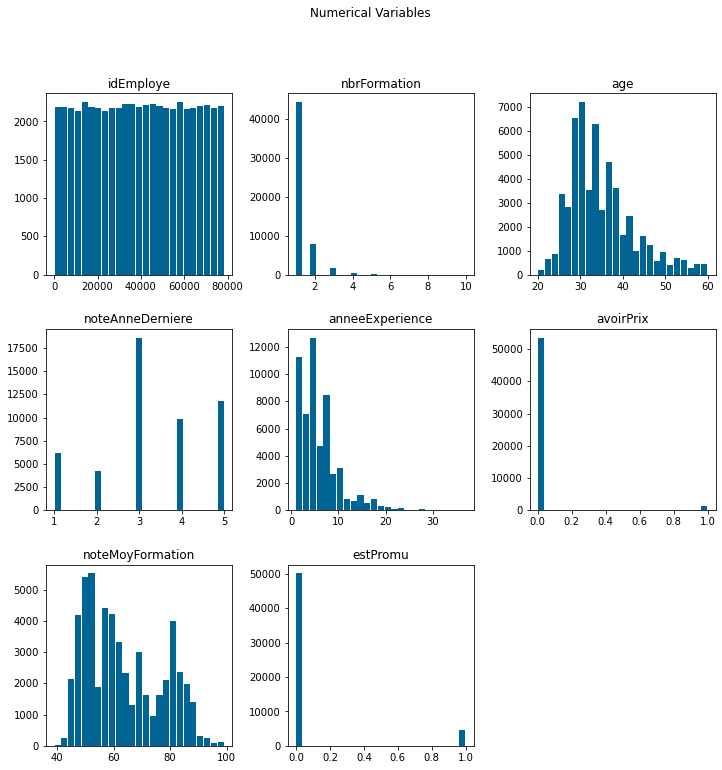

In [5]:
#numerical variables including target

ax = train.hist(bins=25, grid=False, figsize=(12,12),color='#006494',zorder=2, rwidth=0.9)
plt.suptitle("Numerical Variables")

## Categorical Features

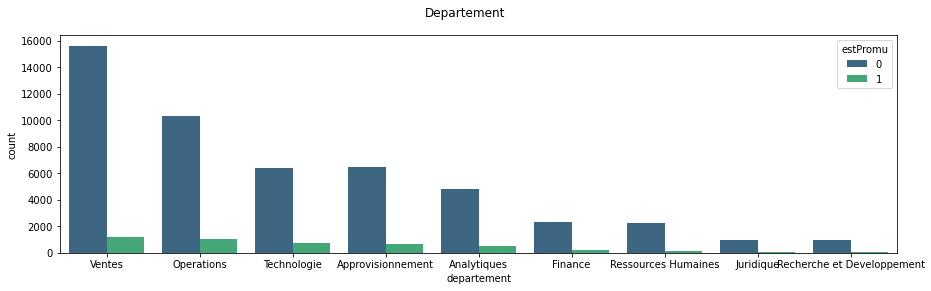

In [6]:
# categorical features - department
plt.figure(figsize=(15,4))
ax = sns.countplot(x="departement",data=train, palette="viridis",hue="estPromu", order = train['departement'].value_counts().index)
ax.grid(False)
plt.suptitle("Departement")
plt.show()

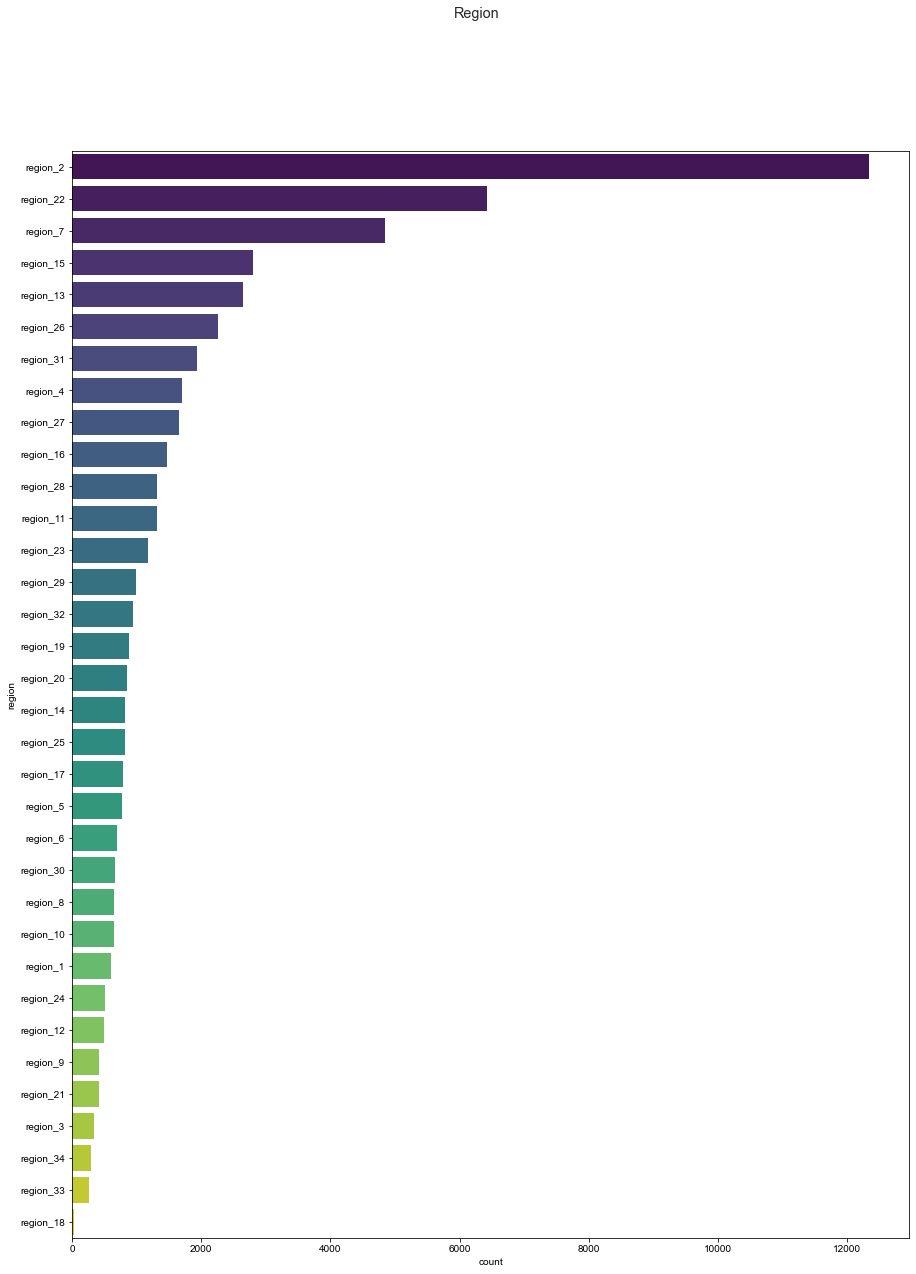

In [7]:
# categorical features - region
plt.figure(figsize=(15,20))
ax = sns.countplot(y="region",data=train, 
                    palette="viridis", order = train['region'].value_counts().index)
ax.grid(False)
sns.set(style="whitegrid")
plt.suptitle("Region")
plt.show()

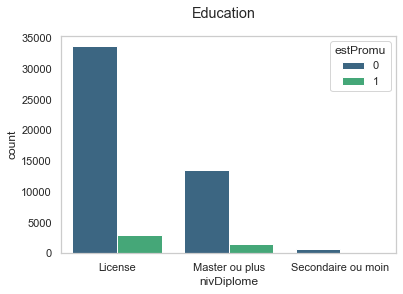

In [8]:
# categorical features - education
plt.figure(figsize=(6,4))
ax = sns.countplot(x="nivDiplome",data=train, palette="viridis",hue="estPromu", order = train['nivDiplome'].value_counts().index)
ax.grid(False)
plt.suptitle("Education")
plt.show()

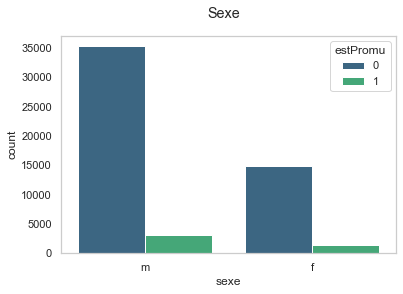

In [9]:
# categorical features - gender
plt.figure(figsize=(6,4))
ax = sns.countplot(x="sexe",data=train, palette="viridis",hue="estPromu", order=train['sexe'].value_counts().index)
sns.set(style="whitegrid")
ax.grid(False)
plt.suptitle("Sexe")
plt.show()

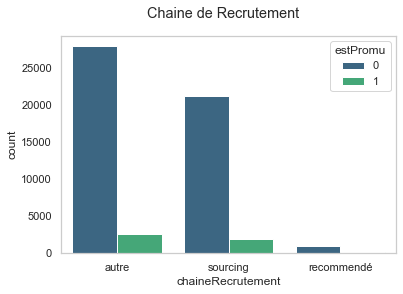

In [10]:
# categorical features - recruitment_channel
plt.figure(figsize=(6,4))
ax = sns.countplot(x="chaineRecrutement",data=train, palette="viridis",hue="estPromu", order=train['chaineRecrutement'].value_counts().index)
ax.grid(False)
sns.set(style="whitegrid")
plt.suptitle("Chaine de Recrutement")
plt.show()

## Target

In [11]:
train.estPromu.value_counts(normalize=True)

0    0.91483
1    0.08517
Name: estPromu, dtype: float64

In [12]:
train.estPromu.value_counts()

0    50140
1     4668
Name: estPromu, dtype: int64

# Preprocessing

In [13]:
df = train
df.shape

(54808, 13)

## Missing Values

In [14]:
#checking missing values
print("Education NA: ",(df.nivDiplome.isna().sum()/len(df))*100)
print("Previous Year Rating NA: ",(df.noteAnneDerniere.isna().sum()/len(df))*100)

Education NA:  4.395343745438622
Previous Year Rating NA:  7.524448985549554


In [15]:
df.nivDiplome.value_counts(normalize=True)

License               0.699803
Master ou plus        0.284834
Secondaire ou moin    0.015363
Name: nivDiplome, dtype: float64

In [16]:
#treating na as a new category called missing
df['nivDiplome'] = df['nivDiplome'].fillna('Missing')
df.nivDiplome.value_counts(normalize=True,dropna=False)

License               0.669045
Master ou plus        0.272314
Missing               0.043953
Secondaire ou moin    0.014688
Name: nivDiplome, dtype: float64

In [17]:
df.noteAnneDerniere.value_counts(normalize=True)

3.0    0.367335
5.0    0.231651
4.0    0.194874
1.0    0.122780
2.0    0.083360
Name: noteAnneDerniere, dtype: float64

In [18]:
df.noteAnneDerniere.median()

3.0

In [19]:
#replace missing value with median
df['noteAnneDerniere'] = df['noteAnneDerniere'].fillna(3.0)
df.noteAnneDerniere.value_counts(normalize=True,dropna=False)

3.0    0.414939
5.0    0.214221
4.0    0.180211
1.0    0.113542
2.0    0.077087
Name: noteAnneDerniere, dtype: float64

## One Hot Encoder

In [20]:
#onehotencoder -> cat features
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto')
ohe_arr = ohe.fit_transform(df[['departement','region','nivDiplome','sexe','chaineRecrutement']]).toarray()
ohe_labels = ohe.get_feature_names(['departement','region','nivDiplome','sexe','chaineRecrutement'])
ohe_df = pd.DataFrame(ohe_arr, columns= ohe_labels)
ohe_df.head()

E:\software\Anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,departement_Analytiques,departement_Approvisionnement,departement_Finance,departement_Juridique,departement_Operations,departement_Recherche et Developpement,departement_Ressources Humaines,departement_Technologie,departement_Ventes,region_region_1,...,region_region_9,nivDiplome_License,nivDiplome_Master ou plus,nivDiplome_Missing,nivDiplome_Secondaire ou moin,sexe_f,sexe_m,chaineRecrutement_autre,chaineRecrutement_recommendé,chaineRecrutement_sourcing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [21]:
#drop columns and concat both dataframes
df.drop(columns= ['departement','region','nivDiplome','sexe','chaineRecrutement'], inplace=True)

In [22]:
df.reset_index(inplace=True)
df = pd.concat([df,ohe_df],axis=1,join='inner')
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 61 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   index                                   54808 non-null  int64  
 1   idEmploye                               54808 non-null  int64  
 2   nbrFormation                            54808 non-null  int64  
 3   age                                     54808 non-null  int64  
 4   noteAnneDerniere                        54808 non-null  float64
 5   anneeExperience                         54808 non-null  int64  
 6   avoirPrix                               54808 non-null  int64  
 7   noteMoyFormation                        54808 non-null  int64  
 8   estPromu                                54808 non-null  int64  
 9   departement_Analytiques                 54808 non-null  float64
 10  departement_Approvisionnement           54808 non-null  fl

In [23]:
df.drop(columns= ['index'], inplace=True)
df.shape

(54808, 60)

## Normalization

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['nbrFormation','age','noteAnneDerniere','anneeExperience','avoirPrix','noteMoyFormation']] = scaler.fit_transform(df[['nbrFormation','age','noteAnneDerniere','anneeExperience','avoirPrix','noteMoyFormation']])
df.head()

,idEmploye,nbrFormation,age,noteAnneDerniere,anneeExperience,avoirPrix,noteMoyFormation,estPromu,departement_Analytiques,departement_Approvisionnement,...,region_region_9,nivDiplome_License,nivDiplome_Master ou plus,nivDiplome_Missing,nivDiplome_Secondaire ou moin,sexe_f,sexe_m,chaineRecrutement_autre,chaineRecrutement_recommendé,chaineRecrutement_sourcing
0,65438,0.000000,0.375,1.0,0.194444,0.0,0.166667,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,65141,0.000000,0.250,1.0,0.083333,0.0,0.350000,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,7513,0.000000,0.350,0.5,0.166667,0.0,0.183333,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2542,0.111111,0.475,0.0,0.250000,0.0,0.183333,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,48945,0.000000,0.625,0.5,0.027778,0.0,0.566667,0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## Seed

In [25]:
seed_value = 20
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
np.random.seed(seed_value)

## Validation Data

In [26]:
#separate train and test datasets
train, test = df[~df['estPromu'].isnull()], df[df['estPromu'].isnull()]
print("Shape of Train Dataset: ",train.shape)
print("Shape of Test Dataset: ",test.shape)

Shape of Train Dataset:  (54808, 60)
Shape of Test Dataset:  (0, 60)


In [27]:
train.drop(columns=['idEmploye'],inplace=True)
print("Shape of Train Dataset: ",train.shape)

Shape of Train Dataset:  (54808, 59)


In [28]:
# train valid split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train.drop(columns=['estPromu']),train['estPromu'], test_size=0.3,random_state=seed_value)
print("Shape of X Train Dataset: ",X_train.shape)
print("Shape of Y Train Dataset: ", y_train.shape)
print("Shape of X Valid Dataset: ",X_valid.shape)
print("Shape of Y Valid Dataset: ",y_valid.shape)

Shape of X Train Dataset:  (38365, 58)
Shape of Y Train Dataset:  (38365,)
Shape of X Valid Dataset:  (16443, 58)
Shape of Y Valid Dataset:  (16443,)


## Feature Selection

In [29]:
#determine the mutual information
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

noteMoyFormation                          0.027157
noteAnneDerniere                          0.016676
avoirPrix                                 0.010285
nivDiplome_License                        0.004887
sexe_m                                    0.003730
anneeExperience                           0.002528
departement_Juridique                     0.002306
chaineRecrutement_autre                   0.002274
nivDiplome_Secondaire ou moin             0.001868
region_region_30                          0.001723
region_region_2                           0.001626
region_region_15                          0.001350
region_region_34                          0.001234
region_region_5                           0.001052
region_region_10                          0.001017
region_region_17                          0.000990
region_region_20                          0.000934
region_region_25                          0.000912
region_region_31                          0.000872
nivDiplome_Missing             

In [41]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

select_top40 = SelectKBest(chi2,k=40)
select_top40.fit(X_train,y_train)
X_train.columns[select_top40.get_support()]

Index(['nbrFormation', 'noteAnneDerniere', 'avoirPrix', 'noteMoyFormation',
       'departement_Analytiques', 'departement_Approvisionnement',
       'departement_Juridique', 'departement_Recherche et Developpement',
       'departement_Ressources Humaines', 'departement_Technologie',
       'departement_Ventes', 'region_region_11', 'region_region_16',
       'region_region_17', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_28', 'region_region_29',
       'region_region_3', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'region_region_4',
       'region_region_5', 'region_region_6', 'region_region_7',
       'region_region_9', 'nivDiplome_License', 'nivDiplome_Master ou plus',
       'nivDiplome_Missing', 'sexe_f', 'chaineRecrutement_recommendé'],
      dtype='object')

In [33]:
feat_select = X_train.columns[select_top40.get_support()]
X_train[feat_select].head(5)

,nbrFormation,age,noteAnneDerniere,anneeExperience,avoirPrix,noteMoyFormation,departement_Analytiques,departement_Approvisionnement,departement_Juridique,departement_Ressources Humaines,...,region_region_5,region_region_6,region_region_7,region_region_9,nivDiplome_License,nivDiplome_Master ou plus,nivDiplome_Missing,sexe_f,sexe_m,chaineRecrutement_recommendé
24499,0.000000,0.525,0.75,0.027778,0.0,0.283333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3064,0.111111,0.250,0.50,0.111111,0.0,0.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
19297,0.000000,0.400,0.75,0.166667,0.0,0.833333,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
23794,0.000000,0.425,0.50,0.027778,0.0,0.366667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
31912,0.000000,0.450,0.50,0.138889,0.0,0.183333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Classification Models

In [34]:
#import modules

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [35]:
#defining learning classifiers

names = ["Nearest_Neighbors","RBF_SVM", "Decision_Tree", "Random_Forest","AdaBoost","Naive_Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=1, gamma=2),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB()]

In [36]:
# calculating models scores
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_valid, y_valid)
    scores.append(score)

models = pd.DataFrame()
models['name'] = names
models['score'] = scores
models.sort_values(by='score',ascending=False)

,name,score
2,Decision_Tree,0.930548
4,AdaBoost,0.929697
3,Random_Forest,0.919783
1,RBF_SVM,0.917168
0,Nearest_Neighbors,0.907803
5,Naive_Bayes,0.513957


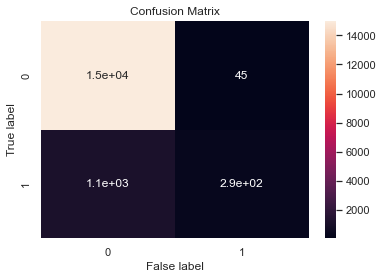

In [42]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score,recall_score, f1_score

adc = AdaBoostClassifier(n_estimators=100)
adc.fit(X_train, y_train)
preds_valid = adc.predict(X_valid)
cf_matrix = confusion_matrix(y_valid, preds_valid)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('False label')
plt.ylabel('True label')
plt.show()

In [43]:
print("Accuracy: ",accuracy_score(y_valid,preds_valid))
print("Recall: ",recall_score(y_valid,preds_valid))
print("Precision: ",precision_score(y_valid,preds_valid))
print("F1 Score: ", f1_score(y_valid,preds_valid))

Accuracy:  0.9296965273976768
Recall:  0.2058613295210865
Precision:  0.8648648648648649
F1 Score:  0.33256351039260973


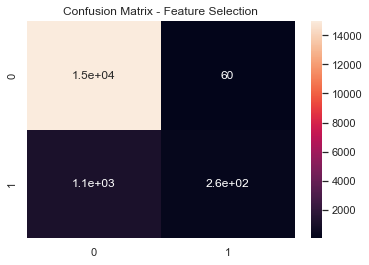

In [44]:
# model only the top_40 features
adc.fit(X_train[feat_select], y_train)
preds_valid = adc.predict(X_valid[feat_select])
cf_matrix = confusion_matrix(y_valid, preds_valid)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix - Feature Selection')
plt.show()

In [45]:
print("Accuracy: ",accuracy_score(y_valid,preds_valid))
print("Recall: ",recall_score(y_valid,preds_valid))
print("Precision: ",precision_score(y_valid,preds_valid))
print("F1 Score: ", f1_score(y_valid,preds_valid))

Accuracy:  0.9267773520647083
Recall:  0.18227305218012865
Precision:  0.8095238095238095
F1 Score:  0.2975495915985997


Click [here](https://www.kaggle.com/raquelreis/adaboostclassifier) to see the original notebook.